# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [3]:
# if plotnine is not installed in Jupter then use the following command to install it 
!pip install plotnine
!pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


Running this project require the following imports 

In [4]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

from sklearn.metrics import silhouette_score

%matplotlib inline

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



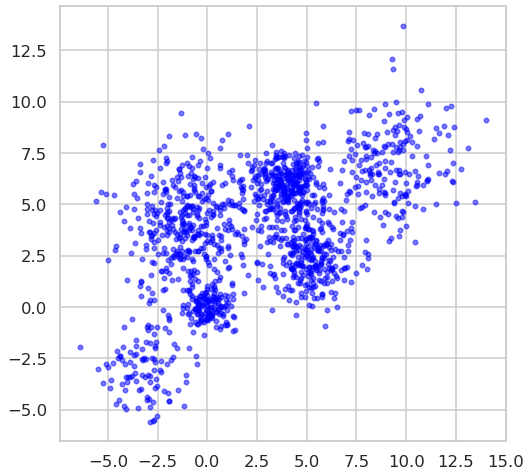

In [6]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

Silhouetter Score: 0.436


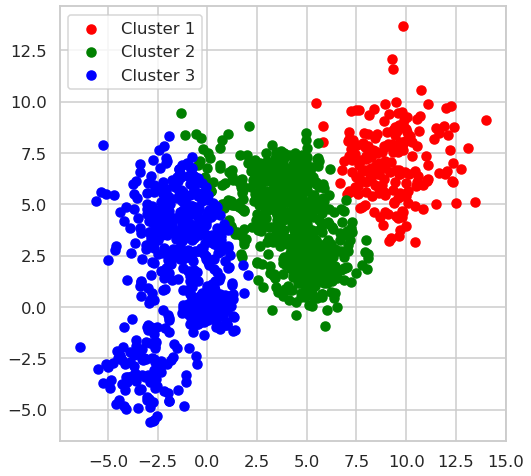

In [7]:

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
X = Multi_blob_Data

# Define the number of clusters
n_clusters = 3

# Perform KMeans clusteringS
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Plot the data points with different colors for each cluster
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label='Cluster {}'.format(i+1))
# Calculate Silhoutte Score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
#
print('Silhouetter Score: %.3f' % score)
plt.legend()
plt.show()

Silhouetter Score: 0.463


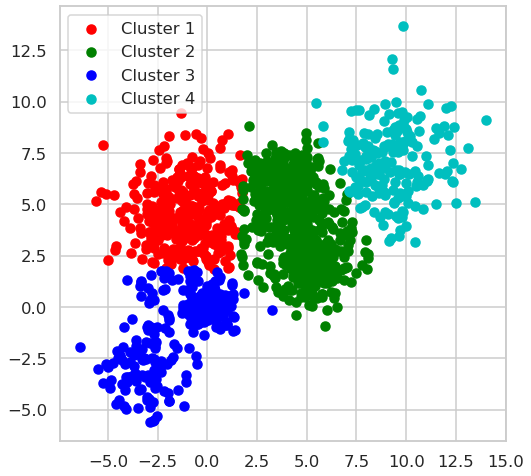

In [8]:
n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
X = Multi_blob_Data

# Define the number of clusters
n_clusters = 4

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Plot the data points with different colors for each cluster
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label='Cluster {}'.format(i+1))
# Calculate Silhoutte Score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
#
print('Silhouetter Score: %.3f' % score)
# Add legend and show the plot
plt.legend()
plt.show()

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

Silhouetter Score: 0.449


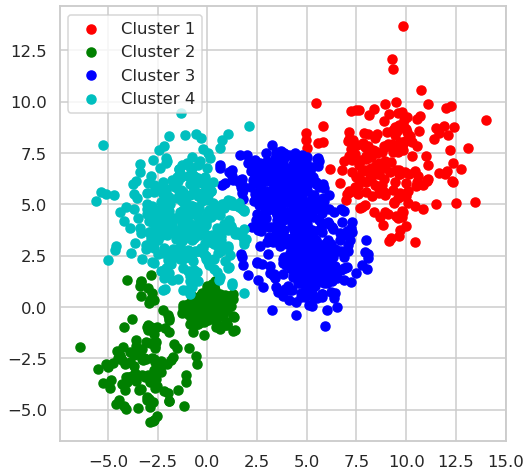

In [9]:
from sklearn.cluster import AgglomerativeClustering
n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
data = Multi_blob_Data
hierarchical_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
labels = hierarchical_cluster.fit_predict(data)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label='Cluster {}'.format(i+1))
# Calculate Silhoutte Score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
#
print('Silhouetter Score: %.3f' % score)
# Add legend and show the plot
plt.legend()
plt.show()

Silhouetter Score: 0.409


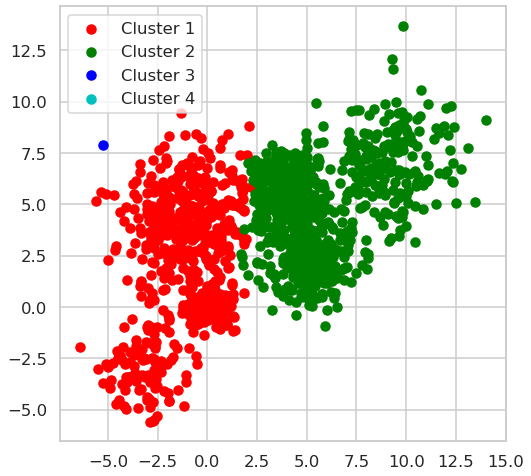

In [10]:
from sklearn.cluster import AgglomerativeClustering
n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
data = Multi_blob_Data
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, affinity='manhattan', linkage='average')
labels = hierarchical_cluster.fit_predict(data)

colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label='Cluster {}'.format(i+1))
# Calculate Silhoutte Score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
#
print('Silhouetter Score: %.3f' % score)
# Add legend and show the plot
plt.legend()
plt.show()

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

Estimated no. of clusters: 4
Estimated no. of noise points: 87
Silhouetter Score: 0.242


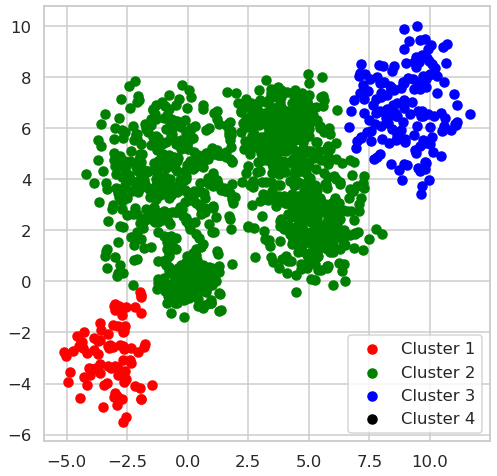

In [11]:
from sklearn.cluster import AgglomerativeClustering
n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
data = Multi_blob_Data
epsilon = 0.7
min_samples = 6.5
# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(data)
labels = db.labels_
no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)


colors = ['r', 'g', 'b', 'k', 'm', 'y', 'c']
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label='Cluster {}'.format(i+1))
# Calculate Silhoutte Score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
#
print('Silhouetter Score: %.3f' % score)
# Add legend and show the plot
plt.legend()
plt.show()

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

In [15]:
from sklearn.mixture import GaussianMixture
n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
data = Multi_blob_Data
n_components = 2
model = GaussianMixture(n_components=n_components, covariance_type='full')
model.fit(data)
x = np.linspace(-10, 15, 1000)
y = np.exp(model.score_samples(data.reshape(-1, 1)))
plt.hist(X, bins=50, density=True, alpha=0.5)
plt.plot(x, y, '-r')
plt.show()


ValueError: X has 1 features, but GaussianMixture is expecting 2 features as input.

In [18]:
x.data

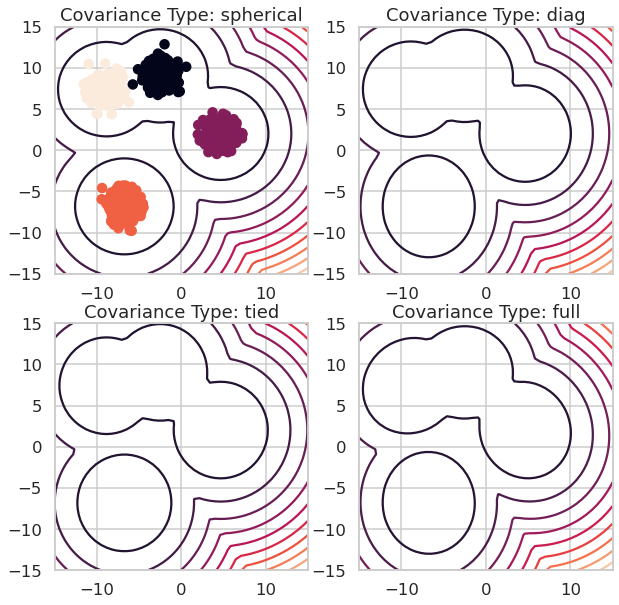

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture

# Generate sample data
X, y = make_blobs(n_samples=1000, centers=4, random_state=42)

# Initialize and fit the Gaussian Mixture model
n_components = 4
covariance_types = ['spherical', 'diag', 'tied', 'full']
models = []
for cov_type in covariance_types:
    model = GaussianMixture(n_components=n_components, covariance_type=cov_type)
    model.fit(X)
    models.append(model)

# Create a 2D contour plot to show the resulting distributions
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

# Plot the data
ax[0, 0].scatter(X[:, 0], X[:, 1], c=y)
ax[0, 0].set_title("Original Data")

# Plot the resulting Gaussian mixture models
for i, model in enumerate(models):
    row = i // 2
    col = i % 2
    x, y = np.meshgrid(np.linspace(-15, 15), np.linspace(-15, 15))
    XX = np.array([x.ravel(), y.ravel()]).T
    Z = -model.score_samples(XX)
    Z = Z.reshape(x.shape)
    ax[row, col].contour(x, y, Z, levels=10)
    ax[row, col].set_title(f"Covariance Type: {covariance_types[i]}")

plt.show()


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [21]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
X = iris_data.data
y = iris_data.target

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
kmeans_labels = kmeans.labels_
score = silhouette_score(X, kmeans_labels, metric='euclidean')
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.553


In [27]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
X = iris_data.data
y = iris_data.target
hclustering = AgglomerativeClustering(n_clusters=3)
hclustering.fit(X)
hclustering_labels = hclustering.labels_
score = silhouette_score(X,hclustering_labels , metric='euclidean')
# Print the score
#
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.554


In [44]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
X = iris_data.data
y = iris_data.target
dbscan = DBSCAN(eps=0.6, min_samples=5)
dbscan.fit(X)
dbscan_labels = dbscan.labels_
score = silhouette_score(X,dbscan_labels , metric='euclidean')
# Print the score
#
print('Silhouetter Score: %.3f' % score)
n_clusters = np.unique(dbscan_labels).shape[0]
print("n_clusters",n_clusters)

Silhouetter Score: 0.538
n_clusters 3


In [46]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
X = iris_data.data
y = iris_data.target
gmixture = GaussianMixture(n_components=3, covariance_type='full')
gmixture.fit(X)
gmixture_labels = gmixture.predict(X)
score = silhouette_score(X,gmixture_labels , metric='euclidean')
# Print the score
#
print('Silhouetter Score: %.3f' % score)
n_clusters = np.unique(gmixture_labels).shape[0]
print("n_clusters",n_clusters)

Silhouetter Score: 0.501
n_clusters 3


* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

## Customer dataset
Repeat all the above on the customer data set 

In [25]:
import pandas as pd

# replace 'file_path.csv' with the path to your CSV file
X = pd.read_csv("Customer.data.csv")
# Define the number of clusters
n_clusters = 3
# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

# Get the cluster assignments for each data point
labels = kmeans.labels_

# Plot the data points with different colors for each cluster
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']
for i in range(n_clusters):
    plt.scatter(X[labels == i, 0], X[labels == i, 1], c=colors[i], label='Cluster {}'.format(i+1))
# Calculate Silhoutte Score
score = silhouette_score(X, labels, metric='euclidean')
# Print the score
#
print('Silhouetter Score: %.3f' % score)

# Add legend and show the plot
plt.legend()
plt.show()

InvalidIndexError: (array([ True,  True, False, ..., False, False, False]), 0)